# IMPORT LIBRARIES

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from env import user, password, host
from scipy import stats
from scipy.stats import levene, ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from datetime import datetime
import math
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")
# ?from pandas_profiling import ProfileReport

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

sns.set(color_codes=True)

from datetime import datetime

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

# Purpose of the this project
### I am trying to classify the city services request from the calls received.  The metric to be used is accuracy.  This will enable better customer service by providing useful data analysis to help determine funding and ataffing allocations to departments.

# ACQUIRE

In [3]:
def get_311_data():
    ''' 
    This function reads in a csv held in the same repository folder
    '''
    df = pd.read_csv('data_311.csv')
    return df


In [4]:
df=get_311_data()

# SUMMARIZE DATA 
#### WHAT DO WE HAVE HERE?

In [5]:
# return first df rows
df.head()

,source_id,dept_division,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,service_request_type,SLA_days,case_status,request_address,council_district,dept_name,standardized_dept_name,dept_subject_to_SLA,index,source_username
0,139344,Miscellaneous,1014127378,1/1/18 8:24,1/2/18 7:37,1/3/18 8:24,NO,-1.03,YES,Dead Animal - Cat,2.00,Closed,"7059 TIMBERCREEK DR, San Antonio, 78227",6,Solid Waste Management,Solid Waste,YES,19,Isis Mendoza
1,139344,Field Operations,1014127380,1/1/18 8:39,1/1/18 12:30,9/26/20 8:39,NO,-998.84,YES,Stray Animal,999.00,Closed,FREDSBG RD and NB LOOP 410 NW,7,Animal Care Services,Animal Care Services,YES,19,Isis Mendoza
2,139344,Signals,1014127389,1/1/18 9:02,1/1/18 10:12,1/3/18 8:30,NO,-1.93,YES,Traffic Signal Ops and Maintenance - Emergency,1.98,Closed,CESAR CHAVEZ W and S ZARZAMORA,5,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza
3,139344,Streets,1014127390,1/1/18 9:04,1/3/18 8:54,1/9/18 8:30,NO,-5.98,YES,Barricade Pick Up,7.98,Closed,CHUPADERAS N and MORALES,1,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza
4,139344,Signals,1014127394,1/1/18 9:15,1/1/18 10:54,1/3/18 8:30,NO,-1.90,YES,Traffic Signal Ops and Maintenance - Emergency,1.97,Closed,CALAVERAS N and FREDSBG RD,1,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza


#### Looks like a log of calls for city service departments

In [6]:
# return last df rows
df.tail()

,source_id,dept_division,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,service_request_type,SLA_days,case_status,request_address,council_district,dept_name,standardized_dept_name,dept_subject_to_SLA,index,source_username
855264,svcCRMSS,Field Operations,1014127272,12/31/17 18:35,12/31/17 18:45,12/31/17 21:35,NO,-0.12,YES,Animal Cruelty(Critical),0.12,Closed,FAY AVE and LYELL,5,Animal Care Services,Animal Care Services,YES,133,svcCRMSS
855265,svcCRMSS,Field Operations,1014127283,12/31/17 19:08,12/31/17 22:03,12/31/17 22:08,NO,-0.00,YES,Animal Cruelty(Critical),0.12,Closed,"207 COVINGTON RD, San Antonio, 78220",2,Animal Care Services,Animal Care Services,YES,133,svcCRMSS
855266,svcCRMSS,Field Operations,1014127299,12/31/17 19:50,12/31/17 19:58,12/31/17 22:50,NO,-0.12,YES,Animal Cruelty(Critical),0.12,Closed,"928 LEAL ST, San Antonio, 78207",1,Animal Care Services,Animal Care Services,YES,133,svcCRMSS
855267,svcCRMSS,Field Operations,1014127312,12/31/17 21:07,12/31/17 21:12,1/1/18 0:07,NO,-0.12,YES,Animal Cruelty(Critical),0.12,Closed,PALMETTO WAY and LEXI PETAL,0,Animal Care Services,Animal Care Services,YES,133,svcCRMSS
855268,svcCRMSS,Field Operations,1014127322,12/31/17 22:04,12/31/17 22:09,1/1/18 1:04,NO,-0.12,YES,Animal Cruelty(Critical),0.12,Closed,"233 THEO AVE E, San Antonio, 78214",3,Animal Care Services,Animal Care Services,YES,133,svcCRMSS


In [7]:
#list column names
df.columns

Index(['source_id', 'dept_division', 'case_id', 'case_opened_date',
       'case_closed_date', 'SLA_due_date', 'case_late', 'num_days_late',
       'case_closed', 'service_request_type', 'SLA_days', 'case_status',
       'request_address', 'council_district', 'dept_name',
       'standardized_dept_name', 'dept_subject_to_SLA', 'index',
       'source_username'],
      dtype='object')

#### Need to see if columns have REDUNDANCY and see if column will be useful 

In [8]:
# give numerical data, stats, min, max, quartile info
df.describe()

,case_id,num_days_late
count,"855,269.00","855,235.00"
mean,"1,013,967,766.62",-49.18
std,"442,275.69",177.04
min,"1,013,225,542.00","-1,417.00"
25%,"1,013,580,953.00",-37.99
50%,"1,013,947,946.00",-5.01
75%,"1,014,349,641.00",-1.83
max,"1,014,759,620.00",519.70


In [9]:
# list number columns and rows, data types,and non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855269 entries, 0 to 855268
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   source_id               855269 non-null  object 
 1   dept_division           855269 non-null  object 
 2   case_id                 855269 non-null  int64  
 3   case_opened_date        855269 non-null  object 
 4   case_closed_date        836936 non-null  object 
 5   SLA_due_date            855235 non-null  object 
 6   case_late               855269 non-null  object 
 7   num_days_late           855235 non-null  float64
 8   case_closed             855269 non-null  object 
 9   service_request_type    855269 non-null  object 
 10  SLA_days                855235 non-null  object 
 11  case_status             855269 non-null  object 
 12  request_address         855269 non-null  object 
 13  council_district        855269 non-null  object 
 14  dept_name           

#### Most are object but case_id is an integer and num_days_late is a float. Also, I might want to organize it by the case_id, or by date, maybe by case_opened_date.

In [10]:
# number null values in each column
df.isnull().sum()

source_id                     0
dept_division                 0
case_id                       0
case_opened_date              0
case_closed_date          18333
SLA_due_date                 34
case_late                     0
num_days_late                34
case_closed                   0
service_request_type          0
SLA_days                     34
case_status                   0
request_address               0
council_district              0
dept_name                   198
standardized_dept_name        0
dept_subject_to_SLA           1
index                         1
source_username               8
dtype: int64

In [11]:
missing = df.isnull().sum()
missing[missing >0]

case_closed_date       18333
SLA_due_date              34
num_days_late             34
SLA_days                  34
dept_name                198
dept_subject_to_SLA        1
index                      1
source_username            8
dtype: int64

In [12]:
18333/855269

0.021435361272301463

#### But it isn't a large amount (only 2.1%), so I will consider dropping columns with nulls

#### NOTE for the cells below. I know that the following is a bit much, but I really need to see how the data is formatted

In [13]:
# Use .unique and .nunique with object columns.

obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col])
    print(df[col].unique()) #prints actual values in column
    print(df[col].nunique()) #prints number of unique values
    print('----------------------')


0           139344
1           139344
2           139344
3           139344
4           139344
            ...   
855264    svcCRMSS
855265    svcCRMSS
855266    svcCRMSS
855267    svcCRMSS
855268    svcCRMSS
Name: source_id, Length: 855269, dtype: object
[139344 124405 135723 139342 136202 141549 140987 132408 119555 141239
 140508 140637 141256 140436 139868 138650 120752 138793 139345 138810
 138605 100137 139807 141954 141752 142659 142673 142738 106463 142989
 119868 142991 119403 137943 136979 140509 140507 140992 140991 141241
 141240 103582 142088 142087 '138810' '141241' '135723' '139344' '142087'
 '138793' '119555' '141549' '141239' '132408' '140987' '140436' '140508'
 '142088' '139345' '136202' '140637' '120752' '139868' '124405' '138605'
 '100137' '141256' '139342' 'svcCRMSS' 'ns16326' 'svcCRMLS' 'CRM_Listener'
 'rs16746' 'mt13131' 'NO10960' 'jw10936' 'mc21309' 'cc17850' 'mp21218'
 'MW16328' 'dc12381' 'gp20685' 'eg16317' 'dl05036' 'mt23152' 'ss21394'
 'ss09159' 'sg22264' 'b

['7059  TIMBERCREEK DR, San Antonio, 78227'
 'FREDSBG RD and NB LOOP 410 NW' 'CESAR CHAVEZ W and S ZARZAMORA' ...
 '10270  WEYBRIDGE, San Antonio, 78250' 'SANDY TRAIL and SPOTTED TRAIL'
 'PALMETTO WAY and LEXI PETAL']
260062
----------------------
0         6
1         7
2         5
3         1
4         1
         ..
855264    5
855265    2
855266    1
855267    0
855268    3
Name: council_district, Length: 855269, dtype: object
[6 7 5 1 2 4 3 10 8 9 0 '2' '5' '10' '0' '1' '7' '8' '4' '9' '6' '3' 'YES'
 'Code Enforcement Services']
24
----------------------
0           Solid Waste Management
1             Animal Care Services
2         Trans & Cap Improvements
3         Trans & Cap Improvements
4         Trans & Cap Improvements
                    ...           
855264        Animal Care Services
855265        Animal Care Services
855266        Animal Care Services
855267        Animal Care Services
855268        Animal Care Services
Name: dept_name, Length: 855269, dtype: object
['S

In [14]:
# see period of time 
df.case_opened_date.min(), df.case_opened_date.max()


('1/1/17 10:03', '9/9/17 9:59')

In [15]:
# Use .value_counts() with object columns to get actual and percent values in categorical columns

obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts()) #prints actual count
    print(df[col].value_counts(normalize=True, dropna=False)) #prints %
    print('----------------------')


CRM_Listener    195416
svcCRMSS        113585
138650           27130
me05816          19840
NO10960          19832
                 ...  
SG26340              1
141954               1
cm26202              1
lb24838              1
MR25792              1
Name: source_id, Length: 164, dtype: int64
CRM_Listener                   0.23
svcCRMSS                       0.13
138650                         0.03
me05816                        0.02
NO10960                        0.02
                       ...         
SG26340                        0.00
141954                         0.00
cm26202                        0.00
lb24838                        0.00
MR25792                        0.00
Name: source_id, Length: 164, dtype: float64
----------------------
Code Enforcement                 274298
Waste Collection                 220696
Field Operations                 119362
Miscellaneous                     46165
Streets                           39193
Signals                           21095


  5.00                   0.08
  7.00                   0.08
  2.00                   0.07
 14.00                   0.05
  3.00                   0.04
                 ...         
  8.90                   0.00
129.91                   0.00
  3.91                   0.00
  7.92                   0.00
  3.66                   0.00
Name: SLA_days, Length: 149040, dtype: float64
----------------------
Closed                       836928
Open                          18333
 78212"                           4
Code Enforcement Services         1
 78210"                           1
 78201"                           1
 78223"                           1
Name: case_status, dtype: int64
Closed                                      0.98
Open                                        0.02
 78212"                                     0.00
Code Enforcement Services                   0.00
 78210"                                     0.00
 78201"                                     0.00
 78223"               

# PREP & CLEAN
#### drop duplicates, get rid of nulls, drop some columns, encode columns

In [16]:
# Total number of rows and columns
df.shape

(855269, 19)

In [17]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (76, 19)


In [18]:
df = df.drop_duplicates()

In [19]:
# Dropping the missing values.
df = df.dropna() 
df.count()

source_id                 836708
dept_division             836708
case_id                   836708
case_opened_date          836708
case_closed_date          836708
SLA_due_date              836708
case_late                 836708
num_days_late             836708
case_closed               836708
service_request_type      836708
SLA_days                  836708
case_status               836708
request_address           836708
council_district          836708
dept_name                 836708
standardized_dept_name    836708
dept_subject_to_SLA       836708
index                     836708
source_username           836708
dtype: int64

In [20]:
df.shape

(836708, 19)

In [21]:
df.head()

,source_id,dept_division,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,service_request_type,SLA_days,case_status,request_address,council_district,dept_name,standardized_dept_name,dept_subject_to_SLA,index,source_username
0,139344,Miscellaneous,1014127378,1/1/18 8:24,1/2/18 7:37,1/3/18 8:24,NO,-1.03,YES,Dead Animal - Cat,2.00,Closed,"7059 TIMBERCREEK DR, San Antonio, 78227",6,Solid Waste Management,Solid Waste,YES,19,Isis Mendoza
1,139344,Field Operations,1014127380,1/1/18 8:39,1/1/18 12:30,9/26/20 8:39,NO,-998.84,YES,Stray Animal,999.00,Closed,FREDSBG RD and NB LOOP 410 NW,7,Animal Care Services,Animal Care Services,YES,19,Isis Mendoza
2,139344,Signals,1014127389,1/1/18 9:02,1/1/18 10:12,1/3/18 8:30,NO,-1.93,YES,Traffic Signal Ops and Maintenance - Emergency,1.98,Closed,CESAR CHAVEZ W and S ZARZAMORA,5,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza
3,139344,Streets,1014127390,1/1/18 9:04,1/3/18 8:54,1/9/18 8:30,NO,-5.98,YES,Barricade Pick Up,7.98,Closed,CHUPADERAS N and MORALES,1,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza
4,139344,Signals,1014127394,1/1/18 9:15,1/1/18 10:54,1/3/18 8:30,NO,-1.90,YES,Traffic Signal Ops and Maintenance - Emergency,1.97,Closed,CALAVERAS N and FREDSBG RD,1,Trans & Cap Improvements,Trans & Cap Improvements,YES,19,Isis Mendoza


In [22]:
df.columns

Index(['source_id', 'dept_division', 'case_id', 'case_opened_date',
       'case_closed_date', 'SLA_due_date', 'case_late', 'num_days_late',
       'case_closed', 'service_request_type', 'SLA_days', 'case_status',
       'request_address', 'council_district', 'dept_name',
       'standardized_dept_name', 'dept_subject_to_SLA', 'index',
       'source_username'],
      dtype='object')

In [23]:
df=df.drop(columns=['source_id', 'case_id', 'SLA_due_date', 'case_closed', 'SLA_days', 'case_status', 'dept_name',
                    'dept_subject_to_SLA', 'index','source_username'])

### Number of days late has both negative and positive values. Requests have to be completed in a timely manner, so if it is a negative number then it was completed before the due date, so I am going to encode 'case_late' column

In [24]:
df['case_late_encoded'] = df.case_late.map({'YES': 1, 'NO':0})

In [25]:
df.head()

,dept_division,case_opened_date,case_closed_date,case_late,num_days_late,service_request_type,request_address,council_district,standardized_dept_name,case_late_encoded
0,Miscellaneous,1/1/18 8:24,1/2/18 7:37,NO,-1.03,Dead Animal - Cat,"7059 TIMBERCREEK DR, San Antonio, 78227",6,Solid Waste,0
1,Field Operations,1/1/18 8:39,1/1/18 12:30,NO,-998.84,Stray Animal,FREDSBG RD and NB LOOP 410 NW,7,Animal Care Services,0
2,Signals,1/1/18 9:02,1/1/18 10:12,NO,-1.93,Traffic Signal Ops and Maintenance - Emergency,CESAR CHAVEZ W and S ZARZAMORA,5,Trans & Cap Improvements,0
3,Streets,1/1/18 9:04,1/3/18 8:54,NO,-5.98,Barricade Pick Up,CHUPADERAS N and MORALES,1,Trans & Cap Improvements,0
4,Signals,1/1/18 9:15,1/1/18 10:54,NO,-1.90,Traffic Signal Ops and Maintenance - Emergency,CALAVERAS N and FREDSBG RD,1,Trans & Cap Improvements,0


# EDA

<AxesSubplot:xlabel='num_days_late'>

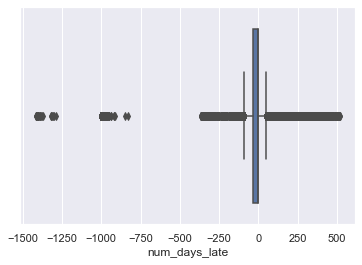

In [44]:
#Detecting Outliers with IQR score technique
sns.boxplot(x=df['num_days_late'])

In [45]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


num_days_late                      35.02
case_late_encoded                   0.00
dtype: float64


In [46]:
#dropping outliers
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
df.shape

(682491, 10)

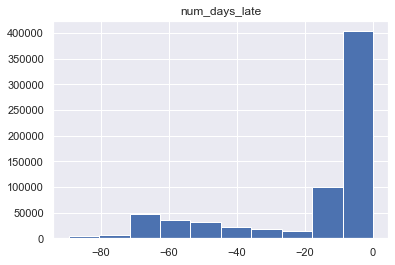

In [48]:
# Check out distributions of numeric columns.

num_cols = df.columns[[df[col].dtype == 'float64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

<AxesSubplot:>

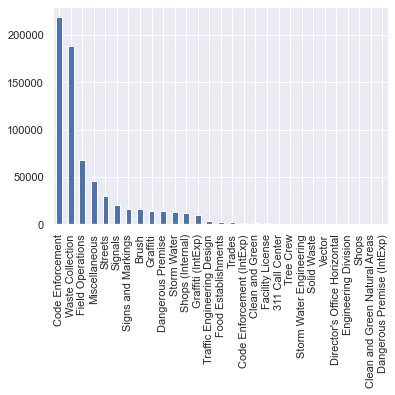

In [49]:
df['dept_division'].value_counts().plot(kind='bar')

In [50]:
df['council_district'] = df['council_district'].astype(str)

<AxesSubplot:>

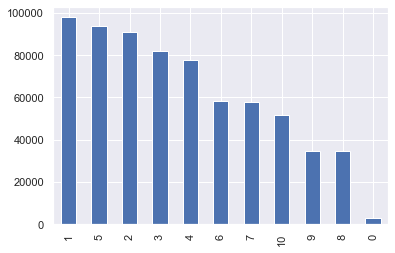

In [51]:
df['council_district'].value_counts().plot(kind='bar')

<AxesSubplot:>

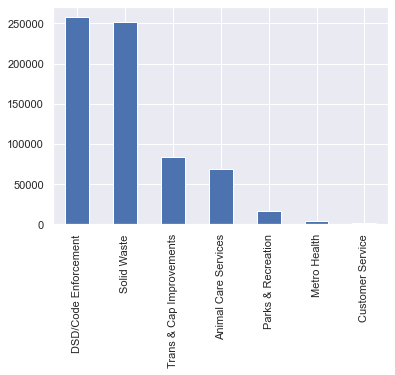

In [52]:
df['standardized_dept_name'].value_counts().plot(kind='bar')

<AxesSubplot:>

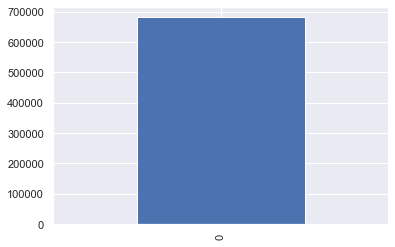

In [54]:
df['case_late_encoded'].value_counts().plot(kind='bar')

In [55]:
df['case_late_encoded'].value_counts()

0    682491
Name: case_late_encoded, dtype: int64

In [ ]:
plt.figure(figsize=(20, 20))
sns.violinplot(x='standardized_dept_name', y='num_days_late' , data=df)
case_late_encoded

<AxesSubplot:xlabel='standardized_dept_name', ylabel='num_days_late'>

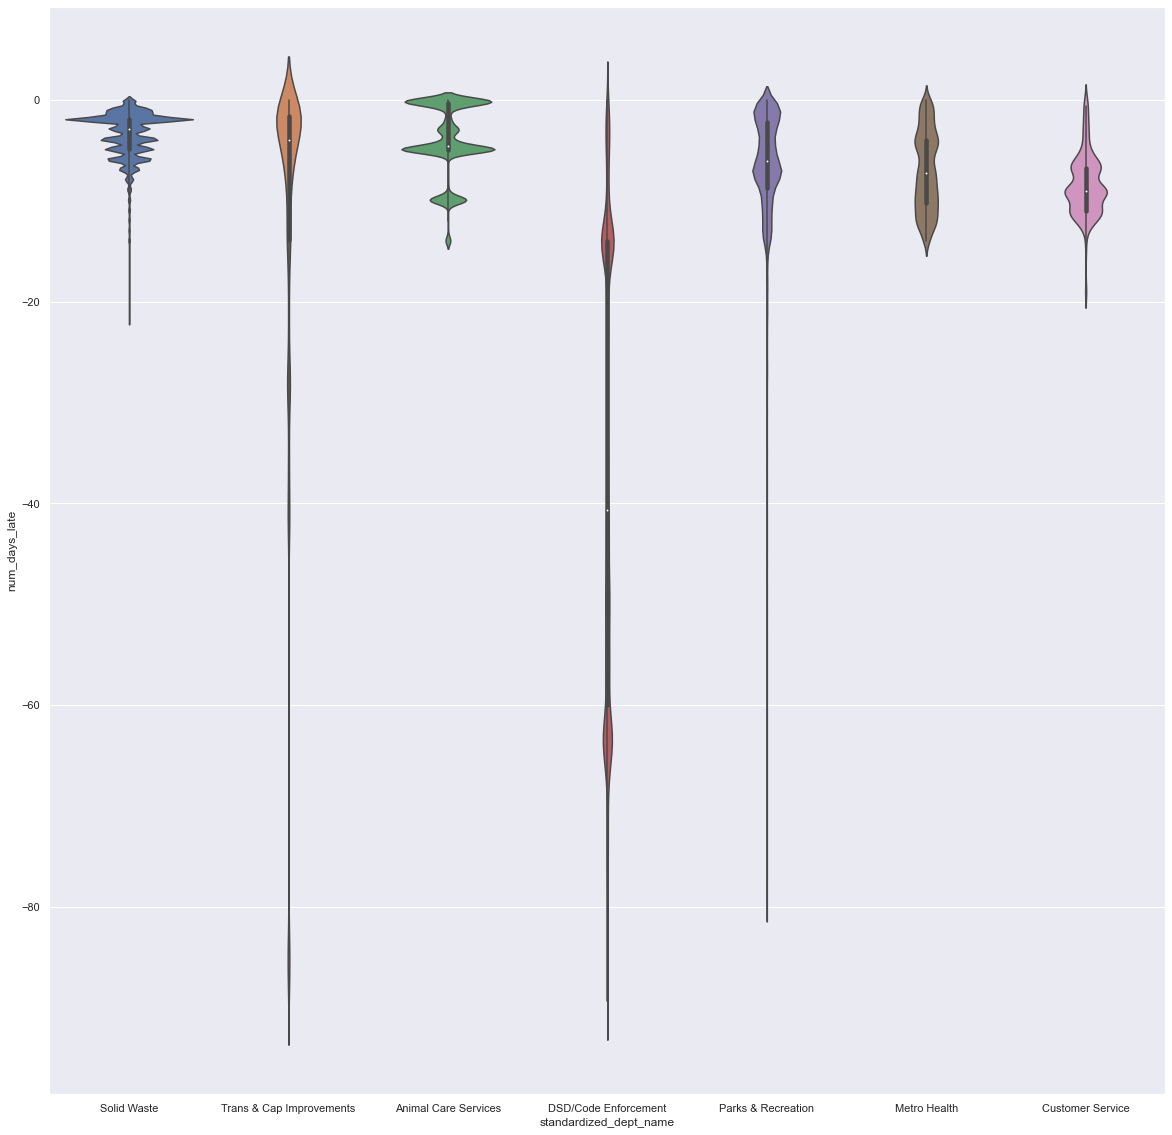

In [53]:
plt.figure(figsize=(20, 20))
sns.violinplot(x='standardized_dept_name', y='num_days_late' , data=df)

<AxesSubplot:xlabel='num_days_late'>

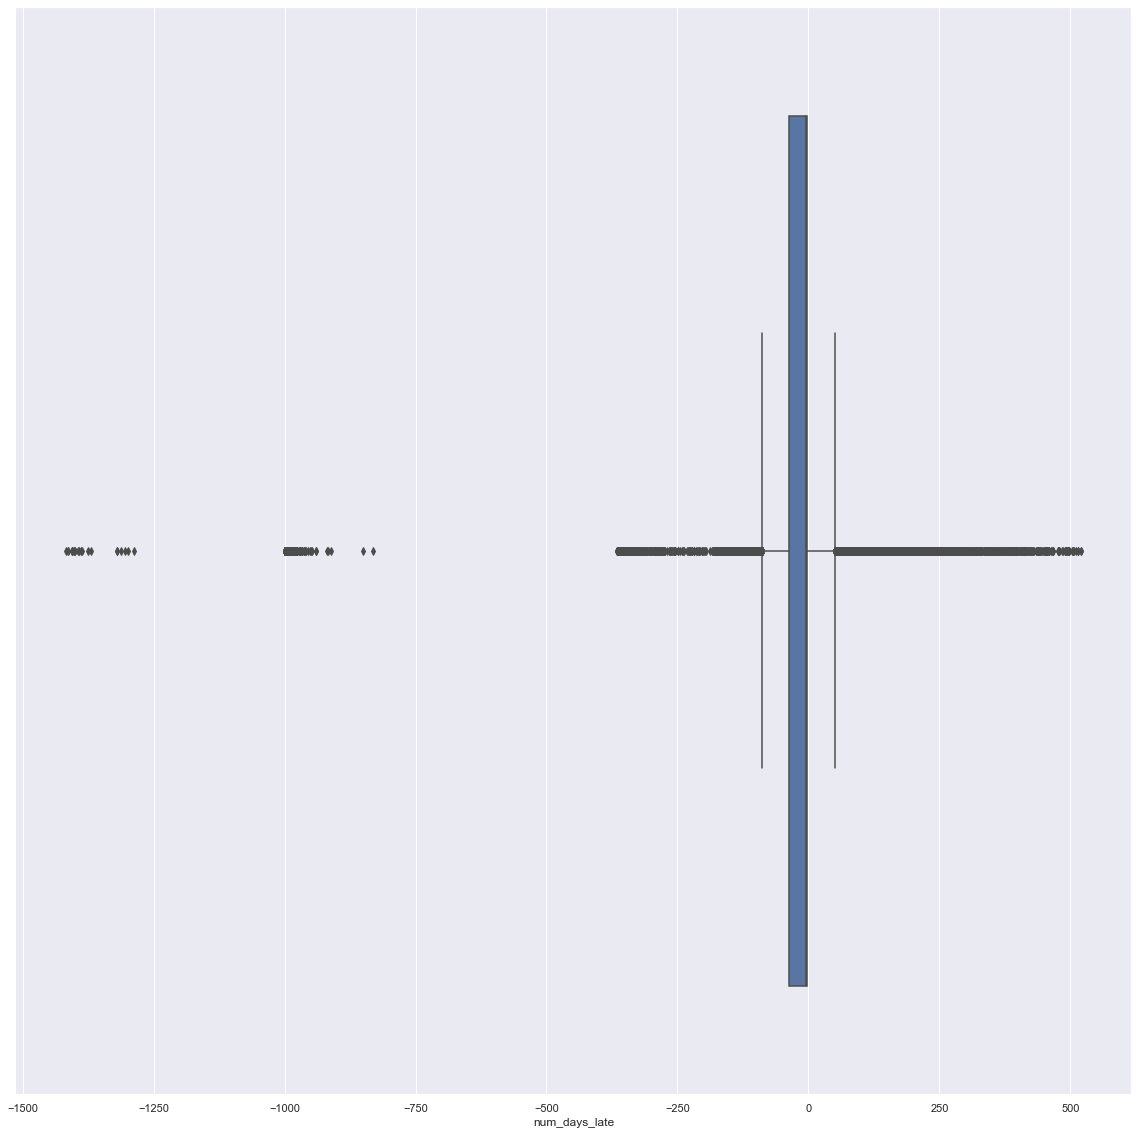

In [35]:
plt.figure(figsize=(20, 20))
sns.boxplot(df['num_days_late'])

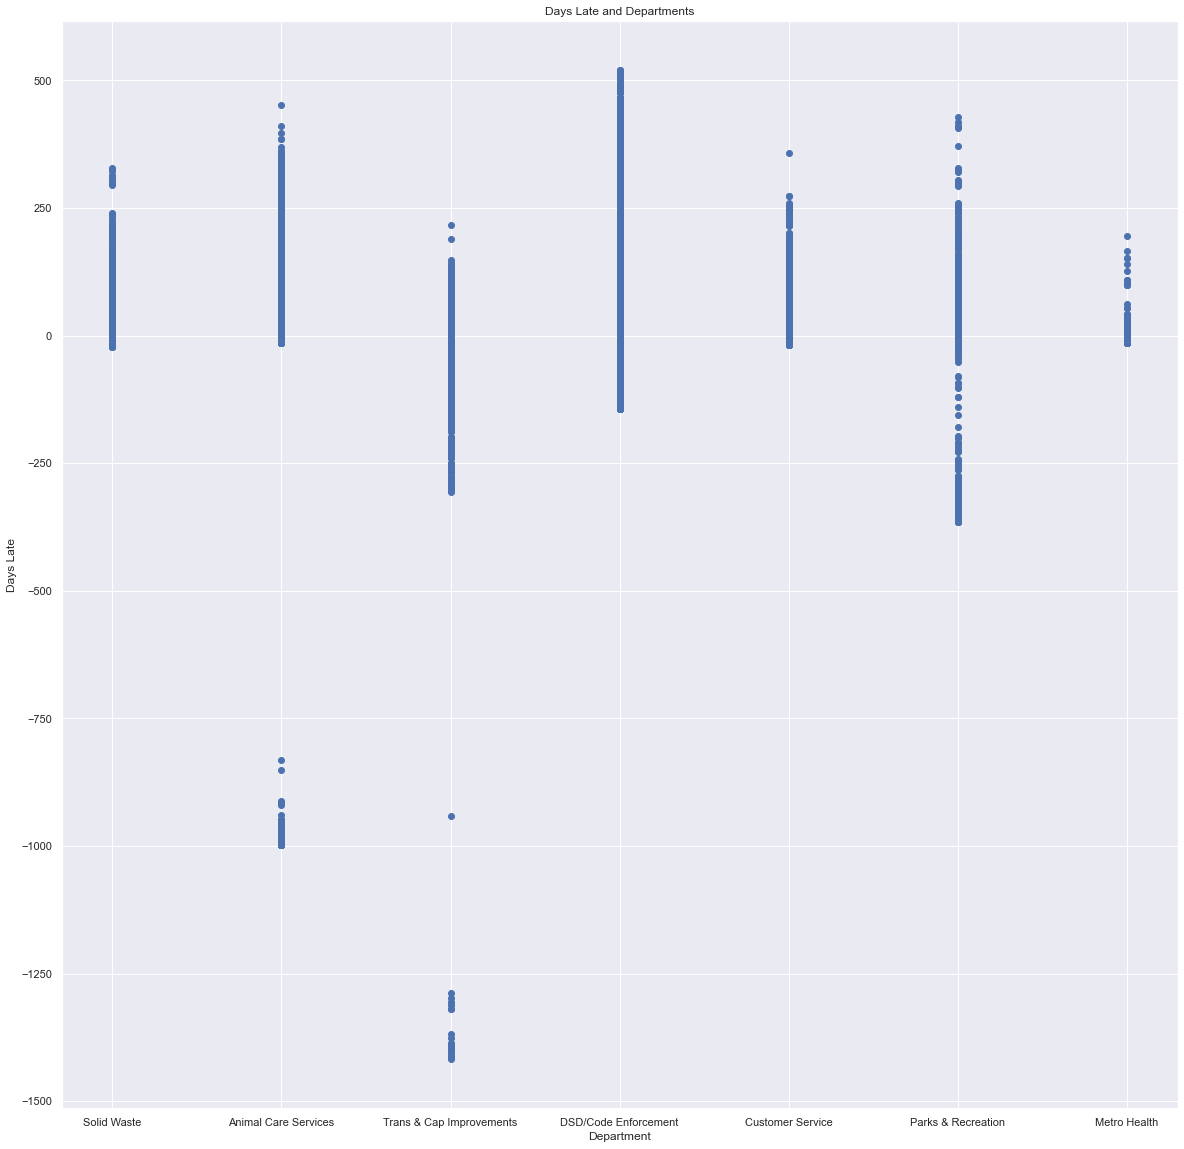

In [36]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['standardized_dept_name'], df['num_days_late'])

plt.title('Days Late and Departments')
plt.xlabel('Department')
plt.ylabel('Days Late')
plt.show()

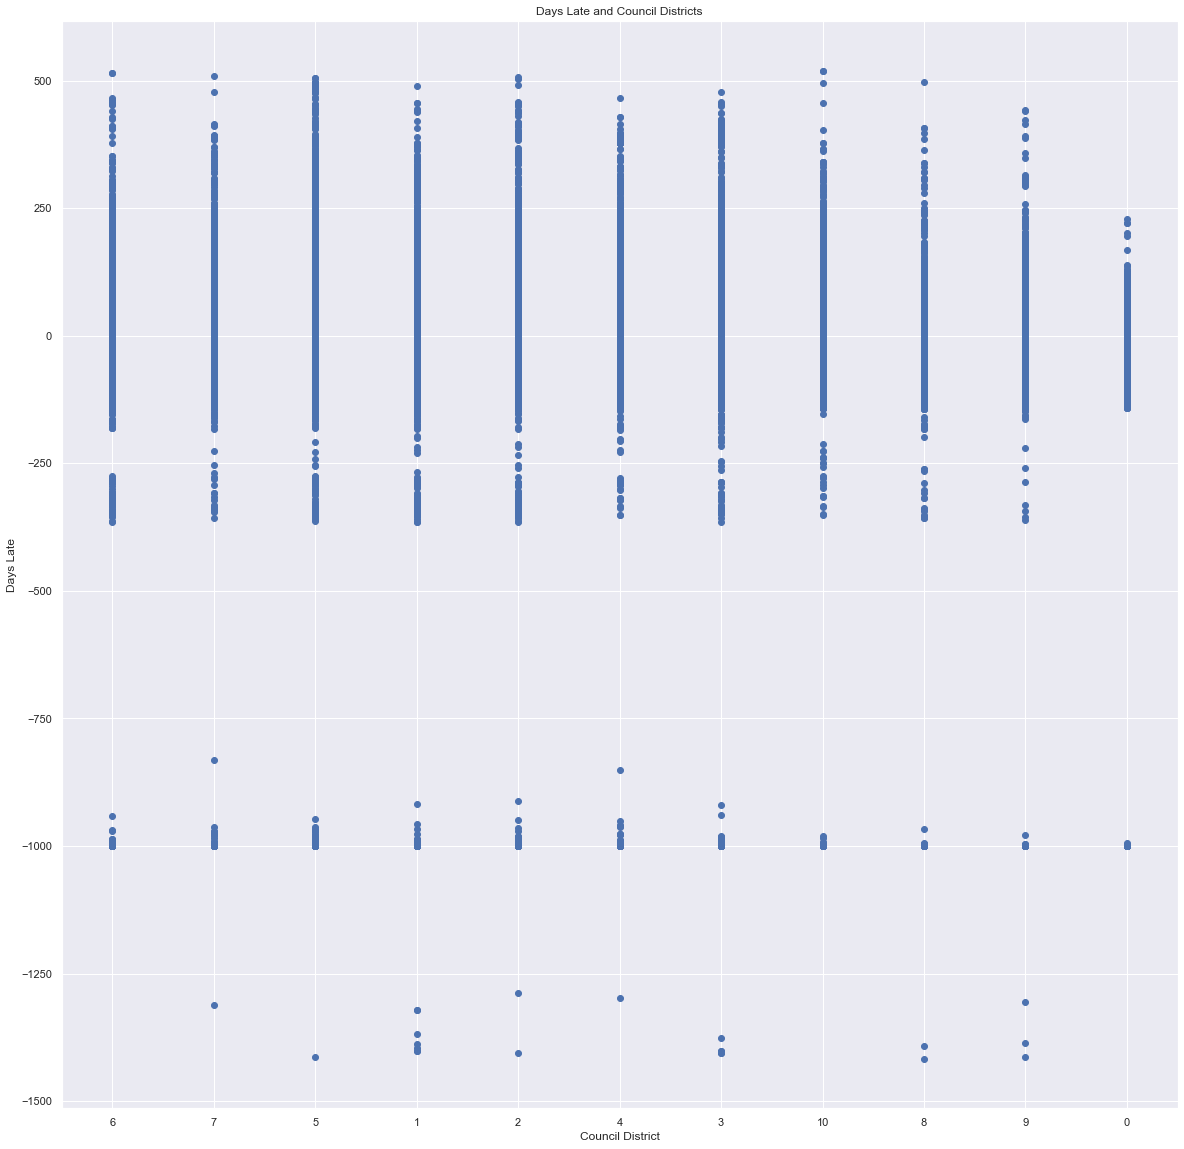

In [37]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['council_district'], df['num_days_late'])

plt.title('Days Late and Council Districts')
plt.xlabel('Council District')
plt.ylabel('Days Late')
plt.show()

In [38]:
#  get numerical data, stats, min, max, quartile info for each district
by_council = df.groupby(['council_district'])
by_council.describe()

num_days_late                       \
                                count                 mean   
council_district                                             
0                            3,772.00               -99.76   
1                          118,724.00               -47.53   
10                          62,695.00               -36.31   
2                          113,595.00               -54.57   
3                          102,083.00               -57.75   
4                           93,208.00               -56.96   
5                          113,978.00               -56.16   
6                           72,920.00               -52.09   
7                           72,396.00               -45.54   
8                           42,381.00               -37.01   
9                           40,956.00               -28.03   

                                                            \
                                  std                  min   
council_district                                             
0                              273.04              -999.00   
1                              161.68            -1,402.10   
10                             138.77              -999.00   
2                              184.87            -1,404.83   
3                              196.60            -1,405.96   
4                              201.03            -1,298.20   
5                              194.15            -1,414.21   
6                              186.90              -999.00   
7                              168.52            -1,312.34   
8                              139.51            -1,417.00   
9                              122.57            -1,413.84   

                                                            \
                                  25%                  50%   
council_district                                             
0                              -61.88                -4.11   
1                              -48.71                -6.79   
10                             -27.73                -4.78   
2                              -45.12                -6.11   
3                              -41.94                -5.02   
4                              -15.75                -8.31   
5                              -41.97                -4.92   
6                              -30.93                -4.87   
7                              -30.91                -4.75   
8                              -15.92                -4.20   
9                              -10.07                -3.96   

                                                            \
                                  75%                  max   
council_district                                             
0                               -0.98               228.26   
1                               -1.94               490.26   
10                              -1.76               519.70   
2                               -1.85               506.15   
3                               -1.90               478.04   
4                               -1.99               466.18   
5                               -1.88               505.04   
6                               -1.49               514.94   
7                               -1.38               509.93   
8                               -1.65               496.83   
9                               -1.75               442.28   

                    case_late_encoded                       \
                                count                 mean   
council_district                                             
0                            3,772.00                 0.14   
1                          118,724.00                 0.09   
10                          62,695.00                 0.10   
2                          113,595.00                 0.12   
3                          102,083.00                 0.11   
4                           93,208.00               

In [39]:
by_dept = df.groupby(['standardized_dept_name'])
by_dept.describe()

num_days_late                       \
                                        count                 mean   
standardized_dept_name                                               
Animal Care Services               118,868.00              -227.39   
Customer Service                     1,715.00                41.25   
DSD/Code Enforcement               311,168.00               -39.48   
Metro Health                         5,235.00                -4.89   
Parks & Recreation                  19,566.00                -5.13   
Solid Waste                        284,603.00                -2.27   
Trans & Cap Improvements            95,553.00               -19.82   

                                                                    \
                                          std                  min   
standardized_dept_name                                               
Animal Care Services                   422.20              -999.00   
Customer Service                        61.40               -19.01   
DSD/Code Enforcement                    44.63              -143.85   
Metro Health                             9.21               -14.00   
Parks & Recreation                      40.50              -364.99   
Solid Waste                              7.03               -21.88   
Trans & Cap Improvements                40.70            -1,417.00   

                                                                    \
                                          25%                  50%   
standardized_dept_name                                               
Animal Care Services                    -9.99                -4.72   
Customer Service                        -9.00                14.18   
DSD/Code Enforcement                   -62.98               -42.03   
Metro Health                            -9.98                -5.97   
Parks & Recreation                      -7.98                -4.81   
Solid Waste                             -4.74                -2.08   
Trans & Cap Improvements               -19.85                -3.99   

                                                                    \
                                          75%                  max   
standardized_dept_name                                               
Animal Care Services                    -0.07               452.10   
Customer Service                        82.88               357.97   
DSD/Code Enforcement                   -13.94               519.70   
Metro Health                            -1.84               194.77   
Parks & Recreation                      -0.85               427.67   
Solid Waste                             -1.35               328.92   
Trans & Cap Improvements                -1.22               216.31   

                            case_late_encoded                       \
                                        count                 mean   
standardized_dept_name                                               
Animal Care Services               118,868.00                 0.20   
Customer Service                     1,715.00                 0.55   
DSD/Code Enforcement               311,168.00                 0.07   
Metro Health                         5,235.00                 0.16   
Parks & Recreation                  19,566.00                 0.19   
Solid Waste                        284,603.00                 0.12   
Trans & Cap Improvements            95,553.00                 0.05   

                                                                    \
                                          std                  min   
standardized_dept_name                                               
Animal Care Services                     0.40                 0.00   
Customer Service                         0.50                 0.00   
DSD/Code Enforcement                     0.26                 0.00   
Metro Health                             0.37                 0.00   
Parks & Recreation                   

In [40]:
by_request= df.groupby(['service_request_type'])
by_request.describe()

num_days_late  \
                                                      count   
service_request_type                                          
1st Call Bagged Leaves                             6,747.00   
2nd Call Bagged Leaves                               421.00   
3rd Call Bagged Leaves with Fee                       24.00   
ADA Infrastructure Complaint/Grievance                33.00   
ADA Obstructions                                       1.00   
...                                                     ...   
Zoning: Multi-Family In Single                       718.00   
Zoning: Outside Storage                              353.00   
Zoning: Oversized Vehicles                         1,712.00   
Zoning: Setbacks                                     713.00   
Zoning: Visual Obstruction                         1,829.00   

                                                             \
                                                       mean   
service_request_type                                          
1st Call Bagged Leaves                                -3.87   
2nd Call Bagged Leaves                                -4.20   
3rd Call Bagged Leaves with Fee                       -3.15   
ADA Infrastructure Complaint/Grievance               -11.84   
ADA Obstructions                                     -13.22   
...                                                     ...   
Zoning: Multi-Family In Single                      -112.06   
Zoning: Outside Storage                             -109.81   
Zoning: Oversized Vehicles                            -5.28   
Zoning: Setbacks                                     -92.26   
Zoning: Visual Obstruction                           -54.83   

                                                             \
                                                        std   
service_request_type                                          
1st Call Bagged Leaves                                 5.29   
2nd Call Bagged Leaves                                 3.43   
3rd Call Bagged Leaves with Fee                        7.24   
ADA Infrastructure Complaint/Grievance                 3.09   
ADA Obstructions                                        NaN   
...                                                     ...   
Zoning: Multi-Family In Single                        50.12   
Zoning: Outside Storage                               47.99   
Zoning: Oversized Vehicles                            21.67   
Zoning: Setbacks                                      77.21   
Zoning: Visual Obstruction                            23.29   

                                                             \
                                                        min   
service_request_type                                          
1st Call Bagged Leaves                               -18.11   
2nd Call Bagged Leaves                                -9.95   
3rd Call Bagged Leaves with Fee                       -9.30   
ADA Infrastructure Complaint/Grievance               -14.99   
ADA Obstructions                                     -13.22   
...                                                     ...   
Zoning: Multi-Family In Single                      -140.01   
Zoning: Outside Storage                             -140.00   
Zoning: Oversized Vehicles                           -24.02   
Zoning: Setbacks                                    -140.00   
Zoning: Visual Obstruction                           -77.00   

                                                             \
                                                        25%   
service_request_type                                          
1st Call Bagged Leaves                                -6.68   
2nd Call Bagged Leaves                                -6.26   
3rd Call Bagged Leaves with Fee                       -8.02   
ADA Infrastructure Complaint/Grievance               -13.86   
ADA Obstructions                                     -13.22   
...       

In [41]:
df.head()

,dept_division,case_opened_date,case_closed_date,case_late,num_days_late,service_request_type,request_address,council_district,standardized_dept_name,case_late_encoded
0,Miscellaneous,1/1/18 8:24,1/2/18 7:37,NO,-1.03,Dead Animal - Cat,"7059 TIMBERCREEK DR, San Antonio, 78227",6,Solid Waste,0
1,Field Operations,1/1/18 8:39,1/1/18 12:30,NO,-998.84,Stray Animal,FREDSBG RD and NB LOOP 410 NW,7,Animal Care Services,0
2,Signals,1/1/18 9:02,1/1/18 10:12,NO,-1.93,Traffic Signal Ops and Maintenance - Emergency,CESAR CHAVEZ W and S ZARZAMORA,5,Trans & Cap Improvements,0
3,Streets,1/1/18 9:04,1/3/18 8:54,NO,-5.98,Barricade Pick Up,CHUPADERAS N and MORALES,1,Trans & Cap Improvements,0
4,Signals,1/1/18 9:15,1/1/18 10:54,NO,-1.90,Traffic Signal Ops and Maintenance - Emergency,CALAVERAS N and FREDSBG RD,1,Trans & Cap Improvements,0


In [42]:
df.columns

Index(['dept_division', 'case_opened_date', 'case_closed_date', 'case_late',
       'num_days_late', 'service_request_type', 'request_address',
       'council_district', 'standardized_dept_name', 'case_late_encoded'],
      dtype='object')

NameError: name 'train' is not defined

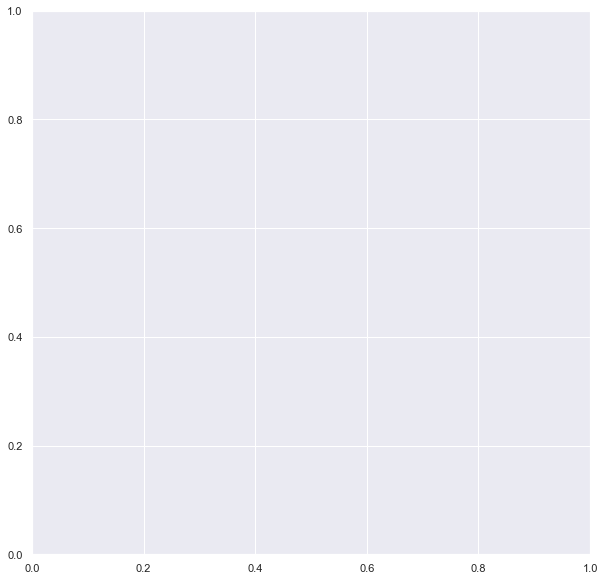

In [43]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(x=train['charter_encoded'], y=train['discipline_percent']);
plt.xticks(rotation = 90)
plt.show()

In [ ]:
num_vars = ['num_days_late', 'case_late_encoded']
cat_vars = ['dept_division', 'case_opened_date', 'case_closed_date', 'case_late','service_request_type', 
            'request_address','council_district', 'standardized_dept_name']

In [ ]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [ ]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()